In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1.5)

In [2]:
data = pd.read_csv('../chopstick/chopstick-effectiveness.csv', names = ['efficiency', 'individual', 'length'], header = 0)

In [3]:
data.describe()

,efficiency,individual,length
count,186.000000,186.000000,186.00000
mean,25.005591,16.000000,255.00000
std,4.039693,8.968413,51.37304
min,14.470000,1.000000,180.00000
25%,22.540000,8.000000,210.00000
50%,24.905000,16.000000,255.00000
75%,27.932500,24.000000,300.00000
max,36.150000,31.000000,330.00000


In [4]:
data.columns

Index(['efficiency', 'individual', 'length'], dtype='object')

In [5]:
data.isnull().sum()

efficiency    0
individual    0
length        0
dtype: int64

In [6]:
aa=data.length.unique()

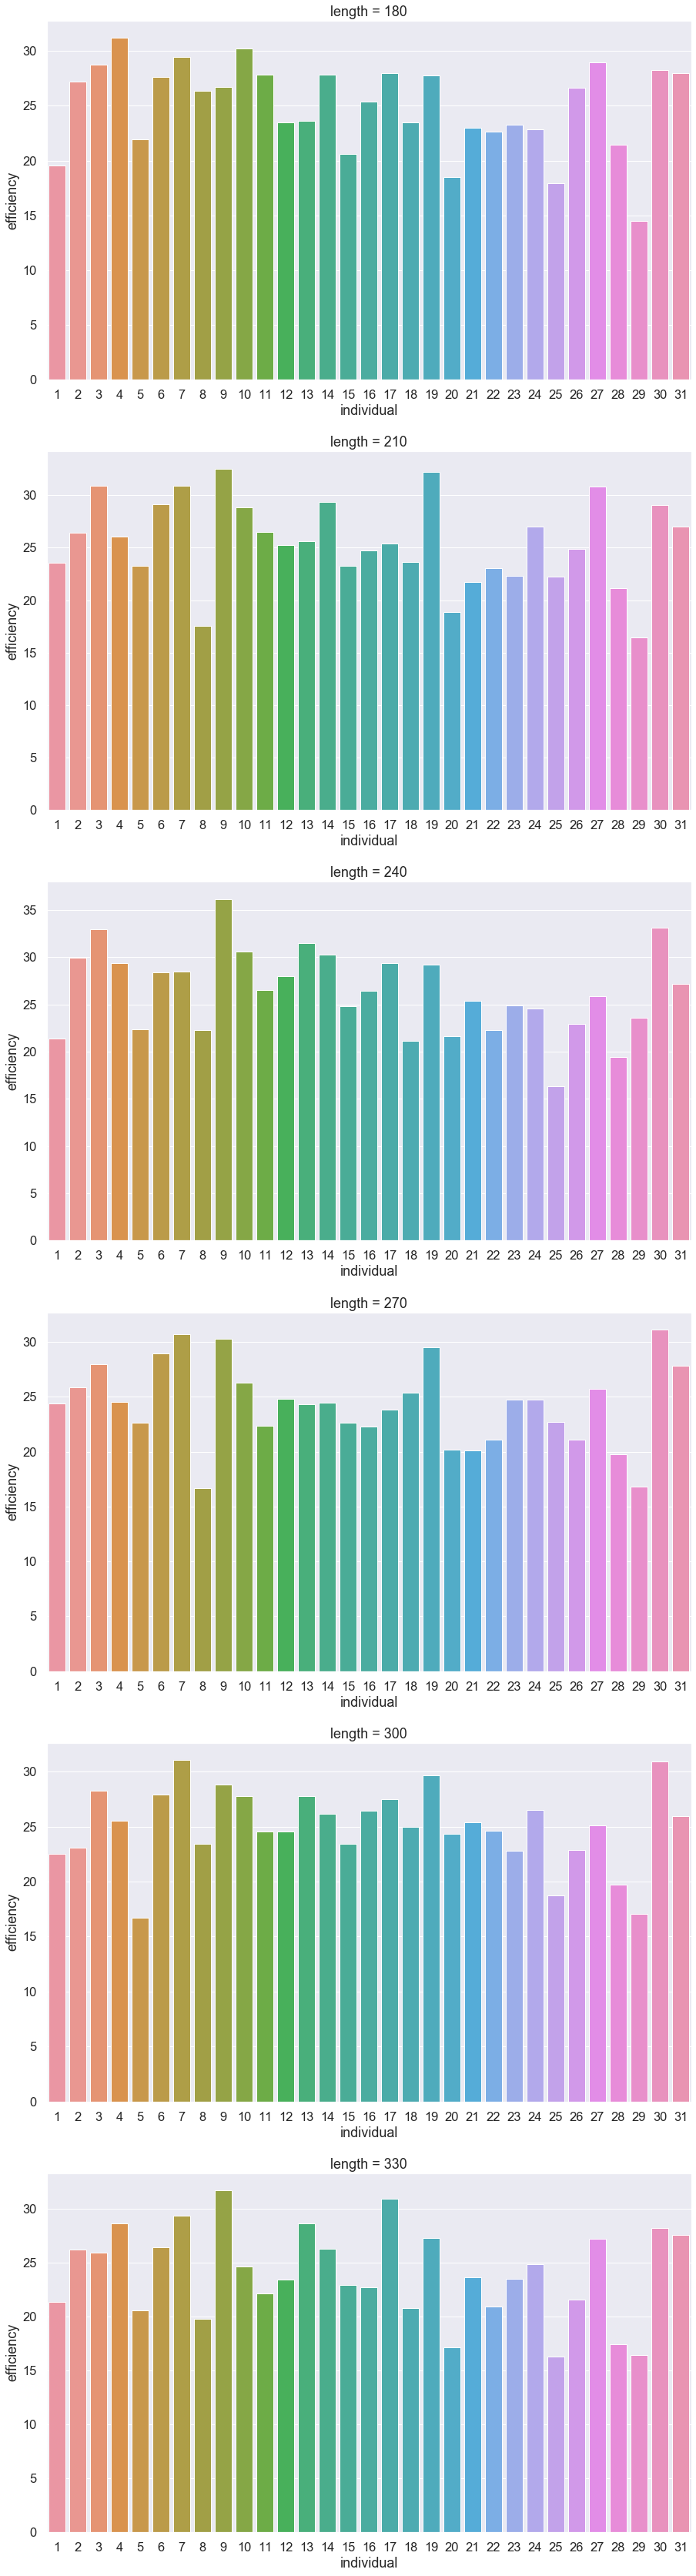

In [7]:
f, ax = plt.subplots(6,1, figsize = (15,60))

for n, i in enumerate(aa):
    sns.barplot(x = data[data['length'] == i ]['individual'], y = data.efficiency ,  ax = ax[n])
    ax[n].set_title("length = {}".format(i))

In [8]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [9]:
data

,efficiency,individual,length
0,19.55,1,180
1,27.24,2,180
2,28.76,3,180
3,31.19,4,180
4,21.91,5,180
...,...,...,...
181,27.22,27,330
182,17.41,28,330
183,16.42,29,330
184,28.22,30,330


In [10]:
data_scale = pd.DataFrame(data = [], columns = [180, 210, 240, 270, 300, 330])
data_scale

,180,210,240,270,300,330


In [11]:
data_scale[180] = np.ravel(data['efficiency'][0:31])
data_scale[210] = np.ravel(data['efficiency'][31:62])
data_scale[240] = np.ravel(data['efficiency'][62:93])
data_scale[270] = np.ravel(data['efficiency'][93:124])
data_scale[300] = np.ravel(data['efficiency'][124:155])
data_scale[330] = np.ravel(data['efficiency'][155:186])
data_scale

,180,210,240,270,300,330
0,19.55,23.53,21.34,24.40,22.50,21.32
1,27.24,26.39,29.94,25.88,23.10,26.18
2,28.76,30.90,32.95,27.97,28.26,25.93
3,31.19,26.05,29.40,24.54,25.55,28.61
4,21.91,23.27,22.32,22.66,16.71,20.54
5,27.62,29.17,28.36,28.94,27.88,26.44
6,29.46,30.93,28.49,30.72,31.07,29.36
7,26.35,17.55,22.24,16.70,23.44,19.77
8,26.69,32.55,36.15,30.27,28.82,31.69
9,30.22,28.87,30.62,26.29,27.77,24.64


In [12]:
data_trans = np.transpose(data_scale)

In [13]:
data_trans

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
180,19.55,27.24,28.76,31.19,21.91,27.62,29.46,26.35,26.69,30.22,...,22.66,23.24,22.82,17.94,26.67,28.98,21.48,14.47,28.29,27.97
210,23.53,26.39,30.90,26.05,23.27,29.17,30.93,17.55,32.55,28.87,...,23.07,22.30,27.04,22.24,24.87,30.85,21.15,16.47,29.05,26.99
240,21.34,29.94,32.95,29.40,22.32,28.36,28.49,22.24,36.15,30.62,...,22.26,24.85,24.56,16.35,22.96,25.82,19.46,23.60,33.10,27.13
270,24.40,25.88,27.97,24.54,22.66,28.94,30.72,16.70,30.27,26.29,...,21.09,24.78,24.74,22.73,21.08,25.70,19.79,16.82,31.15,27.84
300,22.50,23.10,28.26,25.55,16.71,27.88,31.07,23.44,28.82,27.77,...,24.64,22.78,26.50,18.71,22.86,25.09,19.72,17.05,30.91,25.92
330,21.32,26.18,25.93,28.61,20.54,26.44,29.36,19.77,31.69,24.64,...,20.91,23.49,24.86,16.28,21.52,27.22,17.41,16.42,28.22,27.52


In [14]:
data_scale = scale.fit_transform(data_trans)

# scale 조정 전 평균

In [15]:
aver_trans = []
for i in range(6):
    aver_trans.append(data_trans[i].mean())
aver_trans

[22.106666666666666,
 26.455,
 29.128333333333334,
 27.556666666666672,
 21.235,
 28.06833333333333]

In [16]:
data_trans.index

Int64Index([180, 210, 240, 270, 300, 330], dtype='int64')

In [17]:
import operator

In [18]:
rank_bf = {}
for i, n in list(zip(data_trans.index, aver_trans)):
    rank_bf[i] = n
    
rank_bf

{180: 22.106666666666666,
 210: 26.455,
 240: 29.128333333333334,
 270: 27.556666666666672,
 300: 21.235,
 330: 28.06833333333333}

In [19]:
sort_trans = sorted(rank_bf.items(), key=operator.itemgetter(1), reverse=True)
sort_trans

[(240, 29.128333333333334),
 (330, 28.06833333333333),
 (270, 27.556666666666672),
 (210, 26.455),
 (180, 22.106666666666666),
 (300, 21.235)]

scale 조정없이 랭킹을 취했을 경우
240, 330, 270, 210, 180, 300 (mm) 순으로 효율이 좋다.

# scale 조정 후 평균

In [20]:
aver_scale = []
for i in range(6):
    aver_scale.append(data_scale[i].mean())

In [21]:
aver_scale

[-0.07519954906215144,
 0.31462162506067387,
 0.5894294147392378,
 -0.23051095848895783,
 -0.008609648746068833,
 -0.5897308835027344]

In [22]:
rank_af = {}
for i, n in list(zip(data_trans.index, aver_scale)):
    rank_af[i] = n
    
rank_af

{180: -0.07519954906215144,
 210: 0.31462162506067387,
 240: 0.5894294147392378,
 270: -0.23051095848895783,
 300: -0.008609648746068833,
 330: -0.5897308835027344}

In [23]:
sort_scale = sorted(rank_af.items(), key=operator.itemgetter(1), reverse=True)
sort_scale

[(240, 0.5894294147392378),
 (210, 0.31462162506067387),
 (300, -0.008609648746068833),
 (180, -0.07519954906215144),
 (270, -0.23051095848895783),
 (330, -0.5897308835027344)]

scale을 조정 후에 랭킹을 취할 경우
240, 210, 300, 180, 270, 330 (mm)순으로 효율이 좋다.

### 따라서 개인에 따라 효율의 차이가 나타나기 때문에 개인특성을 조정 후에 각 featuer의 평균을 취해줘야 한다.